In [16]:
import argparse
import os
from os import listdir
from os.path import isfile, join

import numpy as np
import math

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import Dataset, DataLoader

from skimage import io, transform
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
!pip install pandas


     |████████████████████████████████| 10.1 MB 5.8 MB/s eta 0:00:01


In [11]:
torch.cuda.is_available()
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

# labels = {}
# normal_ids = listdir('./drive/My Drive/chest_xray/train/NORMAL')
# labels = dict(zip(normal_ids, np.zeros(len(normal_ids), dtype='int')))
# pneumonia_ids = listdir('./drive/My Drive/chest_xray/train/PNEUMONIA')
# labels.update(dict(zip(pneumonia_ids, np.ones(len(pneumonia_ids), dtype='int'))))
train_meta = pd.read_csv('../data/ISIC_2019_Training_Metadata.csv')
train_meta

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [34]:
# class ISICDataset(Dataset):
#     """Face Landmarks dataset."""

#     def __init__(self, csv_file, root_dir, transform=None):
#         """
#         Args:
#             csv_file (string): Path to the csv file with annotations.
#             root_dir (string): Directory with all the images.
#             transform (callable, optional): Optional transform to be applied
#                 on a sample.
#         """
#         self.df = pd.read_csv(csv_file)
#         self.root_dir = root_dir
#         self.transform = transform

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()

#         img_name = os.path.join(self.root_dir,
#                                 self.df.iloc[idx, 0] + '.jpg')
#         image = io.imread(img_name)
#         landmarks = self.df.iloc[idx, 3:]
#         landmarks = np.array([landmarks])
#         #sample = {'image': image, 'landmarks': landmarks}

#         if self.transform:
#             image = self.transform(image)

#         return image

In [35]:
workers = 2
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [41]:
root_dir = '../data/'
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

isic_dataset = dset.ImageFolder(root=root_dir,
                          transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),]))
dataloader = torch.utils.data.DataLoader(isic_dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)
#train_iter = iter(dataloader)

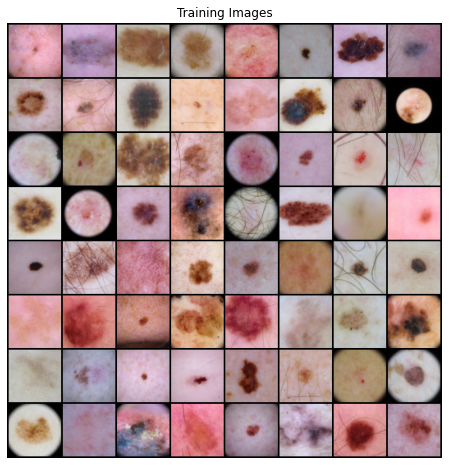

In [42]:
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

### GAN

In [19]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999
